# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [1]:
#importing pandas and matplot packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder as LE

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
train_data = pd.read_csv('drive/My Drive/Kaggle_HP/train.csv', header = 'infer')
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
#Data cleaning - correction and treatment of null values

train_data.loc[train_data['Alley'].isna(),'Alley']  = "No alley"
train_data.loc[train_data['FireplaceQu'].isna(),'FireplaceQu']  = "No"
train_data.loc[train_data['PoolQC'].isna(),'PoolQC']  = "No"
train_data.loc[train_data['Fence'].isna(),'Fence']  = "No"
train_data.loc[train_data['MiscFeature'].isna(),'MiscFeature']  = "No"
train_data.loc[train_data['GarageCond'].isna(),'GarageCond']  = "No"
train_data.loc[train_data['GarageQual'].isna(),'GarageQual']  = "No"
train_data.loc[train_data['GarageFinish'].isna(),'GarageFinish']  = "No"
train_data.loc[train_data['GarageType'].isna(),'GarageType']  = "No"
train_data.loc[train_data['BsmtFinType2'].isna(),'BsmtFinType2']  = "No"
train_data.loc[train_data['BsmtFinType1'].isna(),'BsmtFinType1']  = "No"
train_data.loc[train_data['BsmtExposure'].isna(),'BsmtExposure']  = "No"
train_data.loc[train_data['BsmtCond'].isna(),'BsmtCond']  = "No"
train_data.loc[train_data['BsmtQual'].isna(),'BsmtQual']  = "No"

In [0]:
#Treatment of missing values - Columns of dtype object are imputed with the most frequent value
#  Columns of other dtypes are imputed with the mean of column

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
  def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
  def transform(self, X, y=None):
        return X.fillna(self.fill, inplace = True)

DataFrameImputer().fit_transform(train_data)


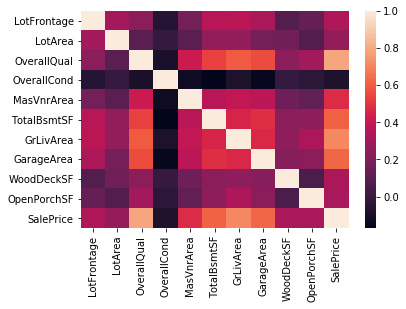

In [6]:
# TODO: show visualization
interesting_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                        'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

subset1 = pd.DataFrame(train_data, columns=interesting_features)
corr = subset1.corr()
sns.heatmap(corr)
plt.show()

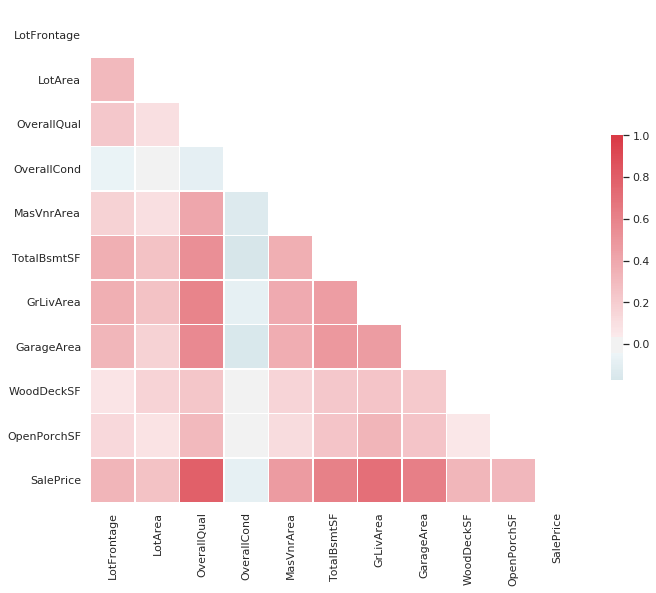

In [7]:
#TO generate a masked correlation heatmap

sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#with sns.axes_style("white"):
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Chosen features for correlation matrix are 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'.
Heatmaps are plotted for the correlations between these variable.

*Discuss most positive and negative correlations:*

From the heatmap, most positive correlation is between OverallQual and SalePrice.This is intuitive because higher quality houses sell at a higher price.
Most negative correlation is between OverallCond and TotalBsmtSF - this indicates that houses with a larger basement are in poorer condition. A possible reason could be that basements in general are kept in poorer condition, as a result a larger basement deteriorates the overall condition of the house.

## Part 2 - Informative Plots

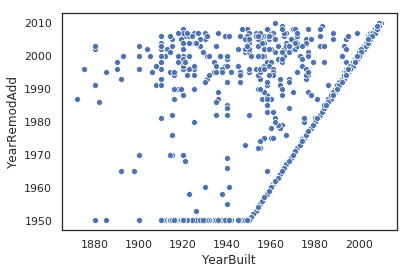

In [0]:
# TODO: code to generate Plot 1 (ScatterPlot)
ax = sns.scatterplot(x="YearBuilt", y="YearRemodAdd", data=train_data)


What interesting properties does Plot 1 reveal?

This scatterplot shows year house is remodelled vs year the house is built. Interesting property to notice is that most of the older homes are remodelled, and in fact all houses built before 1950 are remodelled (plot shows no remodelled houses before 1950). It can also be observed visually that most of the remodelling is done after 1990.

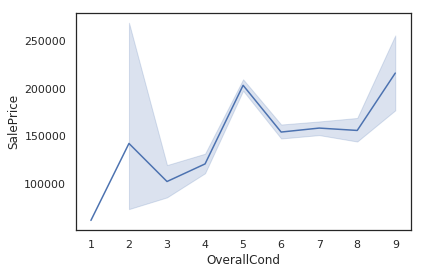

In [0]:
# TODO: code to generate Plot 2 (LinePlot)
#ax = sns.lineplot(x="OverallCond", y="OverallQual", data=train_data)

ax = sns.lineplot(x="OverallCond", y="SalePrice", data=train_data)

What interesting properties does Plot 2 reveal?

Better conditioned houses do not necessarily have higher Sale Price. Especially for homes in poor condition (<3), there is strong negative relationship between overall condition and Sale price. Also, the overall correlation between overall condition and Sale price is negative. This indicates that the variables related to condition of the house might be less important.

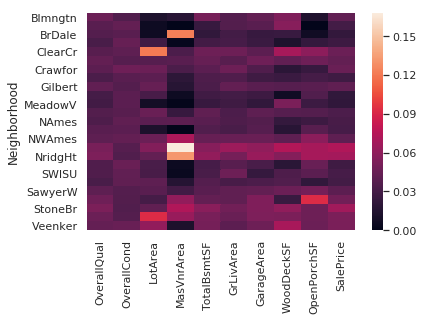

In [14]:
# TODO: code to generate Plot 3 (HeatMap)
def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas Dataframe by the total sum of each column'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)

grouped = train_data.groupby(by = 'Neighborhood')
data = grouped.mean()[['OverallQual', 'OverallCond', 'LotArea','MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

data = df_column_normalize(data)

sns.heatmap(data)

What interesting properties does Plot 3 reveal?

The heatmap shows the variation of some house features across Neighborhoods. This is useful to understand how house features vary by neighborhood. We can notice that features like OverallQual, OverallCond, GarageArea, TotaBsmtSF, GrLivArea do not vary much across the neighborhoods. Features that are highly unique to neighborhoods are MasVnrArea, LotArea, OpenPorchSF and WooddeckSF - which seems to indicate that houses in different neighborhoods vary more on building material, appearance and size of the lot rather than the living areas, quality and condition.

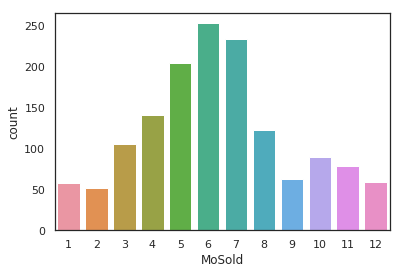

In [32]:
# TODO: code to generate Plot 4 (Histogram or barchart)

sns.countplot(x= 'MoSold', data = train_data)
plt.show()

What interesting properties does Plot 4 reveal?

The above frequency plot shows the month houses are sold in. It is clear that a large portion of houses are sold in spring and summer months (May - July). Peak Winter months (Dec-Feb) have especially low activity.

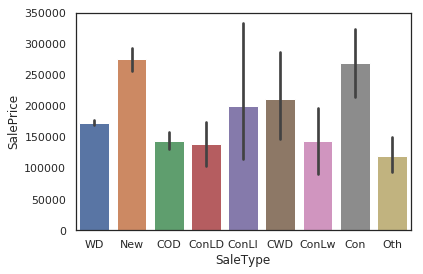

In [28]:
# TODO: code to generate Plot 5

sns.barplot(x= 'SaleType', y = 'SalePrice', data = train_data)
plt.show()

What interesting properties does Plot 5 reveal?

The above barplot shows the mean Sale Price by Type of sale, the vertical lines also show the price range. The Sale prices of New houses is highest and shows low variance, indicating the prices of new houses are very similar. 
Sale types of Contract with regular terms (Con) are the next highest. Sale types with lowest prices are Contracts with low downpayments (ConLD, ConLw), Court officer deed/Estate (COD) and other.
One useful inference is that low downpayment (ConLD, ConLW) group could be useful to predict house prices.

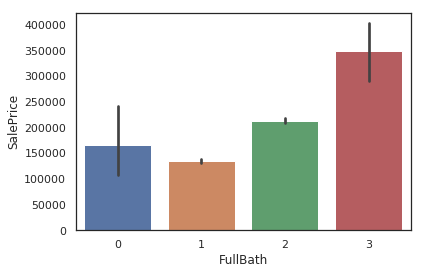

In [41]:
sns.barplot(x= 'FullBath', y = 'SalePrice', data = train_data)

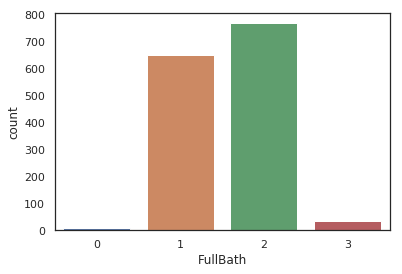

In [40]:
sns.countplot(x='FullBath', data = train_data)

## Part 3 - Handcrafted Scoring Function

To construct a scoring function, we first handpick some important features based on the earlier analysis and some intuition. For a given feature type take the mean saleprice of the type and normalize by dividing with the total mean. (Except in case of lotarea, for this feature the lotarea of the house is divided by mean lot area to get the score). In the end weights are assigned to each score based on the feature importance.

**Scoring features and weights used are:**

1. SaleType - 0.1
2. LotArea - 0.1
3. Neighborhood - 0.15
4. OverallQual - 0.35
5. ExterQual - 0.05
6. Condition1 - 0.05 
7. YrSold - 0.05
8. HouseStyle - 0.05
9. Foundation - 0.05
10. FullBath - 0.05

In [0]:
# TODO: code for scoring function
#vectors for each feature - to give score based on feature type

f1 = (train_data.groupby(by = 'SaleType').mean()['SalePrice'])/train_data['SalePrice'].mean()
f2 = (1/train_data['LotArea'].mean())
f3 = (train_data.groupby(by = 'Neighborhood').mean()['SalePrice'])/train_data['SalePrice'].mean()
f4 = train_data.groupby(by = 'OverallQual').mean()['SalePrice']/train_data['SalePrice'].mean()
f5 = train_data.groupby(by = 'ExterQual').mean()['SalePrice']/train_data['SalePrice'].mean()
f6 = train_data.groupby(by = 'Condition1').mean()['SalePrice']/train_data['SalePrice'].mean()
f7 = train_data.groupby(by = 'YrSold').mean()['SalePrice']/train_data['SalePrice'].mean()
f8 = train_data.groupby(by = 'HouseStyle').mean()['SalePrice']/train_data['SalePrice'].mean()
f9 = train_data.groupby(by = 'Foundation').mean()['SalePrice']/train_data['SalePrice'].mean()
f10 = train_data.groupby(by = 'FullBath').mean()['SalePrice']/train_data['SalePrice'].mean()

In [0]:
#implementing the function
def scoring_function(H):
    return (0.1*f1[H['SaleType']] + 0.10*f2*H['LotArea'] + 0.15*f3[H['Neighborhood']] + 0.35*f4[H['OverallQual']] +
            0.05*f5[H['ExterQual']] + 0.05*f6[H['Condition1']] + 0.05*f7[H['YrSold']] + 0.05*f8[H['HouseStyle']] +
            0.05*f9[H['Foundation']] + 0.05*f10[H['FullBath']])

In [112]:
train_data['function_score'] = train_data.apply(scoring_function, axis=1)
train_data[['function_score','SalePrice']].corr()

,function_score,SalePrice
function_score,1.000000,0.853075
SalePrice,0.853075,1.000000


What are the ten most desirable houses?

In [110]:
print("Ten most desirable houses are:\n", train_data.nlargest(10, 'function_score'))


Ten most desirable houses are:
         Id  MSSubClass MSZoning  ...  SaleCondition  SalePrice function_score
313    314          20       RL  ...         Normal     375000       3.034569
249    250          50       RL  ...         Normal     277000       2.402816
335    336         190       RL  ...         Normal     228950       2.400393
1298  1299          60       RL  ...        Partial     160000       2.083298
706    707          20       RL  ...         Normal     302000       2.060023
1169  1170          60       RL  ...         Normal     625000       1.944203
523    524          60       RL  ...        Partial     184750       1.916817
691    692          60       RL  ...         Normal     755000       1.847425
769    770          60       RL  ...         Normal     538000       1.811470
58      59          60       RL  ...        Partial     438780       1.807351

[10 rows x 82 columns]


What are the ten least desirable houses?

In [111]:
print("Ten least desirable houses:\n", train_data.nsmallest(10, 'function_score'))

Ten least desirable houses:
         Id  MSSubClass MSZoning  ...  SaleCondition  SalePrice function_score
533    534          20       RL  ...         Normal      39300       0.586176
636    637          30       RM  ...         Normal      60000       0.588599
88      89          50  C (all)  ...        Abnorml      85000       0.640952
916    917          20  C (all)  ...        Abnorml      35311       0.641605
375    376          30       RL  ...         Normal      61000       0.650187
614    615         180       RM  ...         Normal      75500       0.657369
1039  1040         180       RM  ...         Normal      80000       0.657799
489    490         180       RM  ...         Normal      86000       0.658265
434    435         180       RM  ...         Normal      81000       0.661154
1100  1101          30       RL  ...         Normal      60000       0.661833

[10 rows x 82 columns]


Describe your scoring function and how well you think it worked.

The reliability of the scoring function depends on accurately identifying the important features and assigning weights. Based on the correlation between score and Sale price (0.853), the scoring function works reasonably well.

From the above tables, it can also be seen that the most desirable houses have high SalePrice while least desirable houses have low SalePrice. This also indicates the scoring function is intuitive. However, the handcrafted function may not be optimal or best performing.

## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function




How well does the distance function work? When does it do well/badly?

## Part 5 - Clustering

In [0]:
# TODO: code for clustering and visualization

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression

features = ['LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
            'GarageArea', 'SalePrice', '1stFlrSF','2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'YearBuilt','YearRemodAdd', 'LotShape']

X = pd.DataFrame(train_data, columns=features)

#X['LotShape'] = X['LotShape'].astype('category')
X['LotShape'] = X['LotShape'].factorize(['Reg', 'IR1', 'IR2', 'IR3'])[0]

#X['LotShape'] = LE.fit_transform(X['LotShape'].astype('int'))

#print(X['LotShape'].cat.codes)
#X['OtherSF'] = train_data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis = 1)

X.dtypes

#X = X.astype('float64')
y = np.log(X["SalePrice"])

X = X.drop('SalePrice', axis = 1)


In [29]:
model = LinearRegression().fit(X, y)
print(model.score(X,y))

model.coef_


0.8514076928218816


array([ 2.32639346e-04,  2.50769542e-06,  9.37384978e-02,  4.89674947e-02,
       -1.66723123e-05,  5.60725995e-05,  4.91230025e-05,  1.57880974e-04,
        2.13070636e-04,  1.15560850e-04,  7.51754147e-05,  1.55805095e-04,
       -1.57877422e-05,  1.88185610e-04,  2.16962868e-04,  4.52647982e-04,
       -4.78036546e-04,  3.28043701e-03,  1.11035558e-03, -1.02418864e-02])

How well/badly does it work? Which are the most important variables?

## Part 7 - External Dataset

In [0]:

# TODO: code to import external dataset and test


Describe the dataset and whether this data helps with prediction.

## Part 8 - Permutation Test

In [0]:
# TODO: code for all permutation tests

Describe the results.

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: FILL HERE

Highest Rank: FILL HERE

Score: FILL HERE

Number of entries: FILL HERE

INCLUDE IMAGE OF YOUR KAGGLE RANKING